In [2]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from lsmc import *
from visualizingData import *
import pandas as pd
import os
import ast

from decimal import Decimal

In [26]:
loaded_matrix = np.load('.\\artificialData\\artificialRatingsV3.npy', allow_pickle=True).item()
sampled_mask = np.load('.\\artificialData\\mask.npy', allow_pickle=True).item().toarray()
dense_matrix = loaded_matrix.toarray()

In [27]:
dense_matrix = dense_matrix[:200,:150]
sampled_mask = sampled_mask[:200,:150]

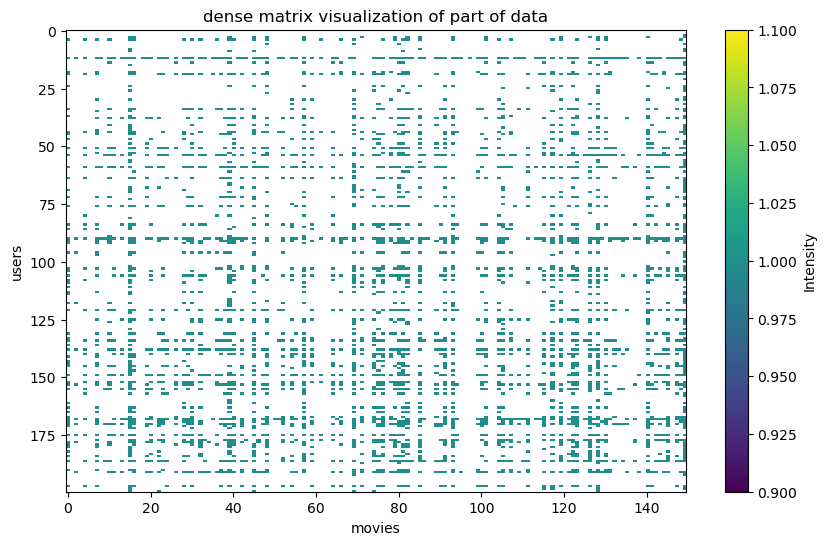

In [28]:
visualizeData(np.where(sampled_mask==0,np.nan,1))

In [29]:
# Matrix dimensions
m, n = dense_matrix.shape

# Initializing matrices and variables
R = dense_matrix  # Original dense matrix
P_init = np.random.rand(m, n)  # Initial guess for matrix P
u_init = np.zeros((m, n))  # Initial values for u
y_init = np.zeros((m, n))  # Initial values for y
s_init = 1  # Initial value for s

# Define ranges for hyperparameters
lambdas = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])  # Regularization parameter λ values
gammas = np.array([0, 0.001, 0.01])  # Step size or learning rate γ values
delta = 1e-2  # Tolerance level for optimization
num_iterations = 100  # Number of iterations for optimization
r_stop = 20



# Define the start, end, and step using Decimal for precision
start = Decimal('0.01')
end = Decimal('0.1')
step = Decimal('0.01')

# Generate the list
decimal_list = [float(start + i * step) for i in range(int((end - start) / step) + 1)]
print(decimal_list)

# Generate rhos for each lambda
rhos = np.array(decimal_list)

# List to store results
results = []




[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


In [30]:

    
# Iterate over rho values
for rho in rhos: 
    # Iterate over lambda values
    for lambda_ in lambdas:
        # Iterate over gamma values
        
        for gamma in gammas:
            # Calculate epsilon based on matrix size and gamma
            epsilon = m * n * gamma  # Error threshold as defined in the paper
            
            # Print current parameter settings
            print(f"Current settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}")

            # Run the optimization function with the current parameters
            P_final, Z_final, u_final, y_final, s_final, errors, r_errors, rank = LMSC_optimize_rank_stop(
                rho, lambda_, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations, r_stop
            )
            
            print(f"Finished w/ settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}; r{rank}\n")
            # Store the results in a dictionary
            result = {
                'lambda': lambda_,
                'rho': rho,
                'gamma': gamma,
                'errors': errors,
                'relative_errors': r_errors,
                'rank': rank
            }
            results.append(result)


Current settings: gamma = 0.0, rho = 0.01, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.0, rho = 0.01, lambda = 0.1; r20

Current settings: gamma = 0.001, rho = 0.01, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.001, rho = 0.01, lambda = 0.1; r20

Current settings: gamma = 0.01, rho = 0.01, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.01, rho = 0.01, lambda = 0.1; r0

Current settings: gamma = 0.0, rho = 0.01, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.0, rho = 0.01, lambda = 0.2; r21

Current settings: gamma = 0.001, rho = 0.01, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.001, rho = 0.01, lambda = 0.2; r20

Current settings: gamma = 0.01, rho = 0.01, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.01, rho = 0.01, lambda = 0.2; r0

Current settings: gamma = 0.0, rho = 0.01, lambd

In [42]:
100*np.linalg.norm((P_final-dense_matrix),'fro')/np.linalg.norm(dense_matrix,'fro')

34.13128130439872

In [31]:
# Assuming 'results' is the list you populated with dictionaries as shown earlier
results_df = pd.DataFrame(results)  # Convert the results list to a DataFrame

# Define the directory name
directory = 'lsmc_validation'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the path to save the DataFrame
file_path = os.path.join(directory, 'validationv2rankStop.csv')

# Save the DataFrame as a CSV file
results_df.to_csv(file_path, index=False)

print(f"Results saved to {file_path}")


Results saved to lsmc_validation\validationv2rankStop.csv


In [32]:


# Define the directory and file path
directory = 'lsmc_validation'
file_path = os.path.join(directory, 'validationv2rankStop.csv')

# Load the DataFrame from the CSV file
results_df = pd.read_csv(file_path)

# Display the loaded DataFrame
print(results_df.head())  # Show the first few rows of the DataFrame


   lambda   rho  gamma                                             errors  \
0     0.1  0.01  0.000  [[3.81455429408934, 3.1122551275127064], [3.87...   
1     0.1  0.01  0.001  [[3.81455429408934, 3.1122551275127064], [3.87...   
2     0.1  0.01  0.010  [[3.81455429408934, 3.1122551275127064], [3.96...   
3     0.2  0.01  0.000  [[3.81455429408934, 3.1122551275127064], [3.87...   
4     0.2  0.01  0.001  [[3.81455429408934, 3.1122551275127064], [3.87...   

                                     relative_errors  rank  
0  [(29.19577807490985, 1.3785727711893263, 30.57...    20  
1  [(29.19577807490985, 1.3785727711893263, 30.57...    20  
2  [(29.19577807490985, 1.3785727711893263, 30.57...     0  
3  [(29.19577807490985, 1.3785727711893263, 30.57...    21  
4  [(29.19577807490985, 1.3785727711893263, 30.57...    20  


In [33]:

def rhoCheckPlots(rho):
    # Assuming your DataFrame is named df_results
    rho_10_data = results_df[results_df['rho'] == rho]

    rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


    last_2_errors = []
    for err_list in np.array(rho_10_data['errors']):
        last_2_errors.append(err_list[-1])

    # Convert data to a numpy array for easier slicing
    data_array = np.array(last_2_errors)

    # Prepare data for three different gamma values
    gamma_0_data = data_array[::3]       # Rows for gamma = 0
    gamma_001_data = data_array[1::3]     # Rows for gamma = 0.001
    gamma_01_data = data_array[2::3]      # Rows for gamma = 0.01
    
    RMSE_1 = gamma_0_data[:,1]
    RMSE_2 = gamma_001_data[:,1]
    RMSE_3 = gamma_01_data[:,1]
    # x = lambdas
    plt.plot(lambdas,RMSE_3, 'o-' ,label='gamma=0.01')
    plt.plot(lambdas,RMSE_2,'o-' ,label='gamma=0.001')
    plt.plot(lambdas,RMSE_1, 'o-' ,label='gamma=0')
    plt.xlabel('lambda')
    plt.ylabel('RMSE')
    
    plt.title(f"RMSE Error for Lambdas at rho={rho}")
    plt.legend()
    plt.show()

C:\Users\kesol\AppData\Local\Temp\ipykernel_25568\1603018844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


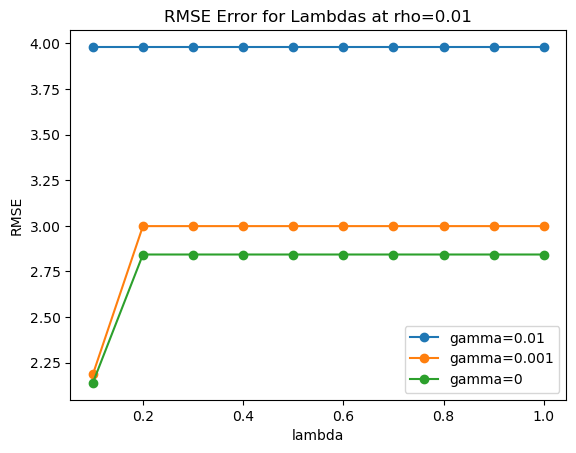

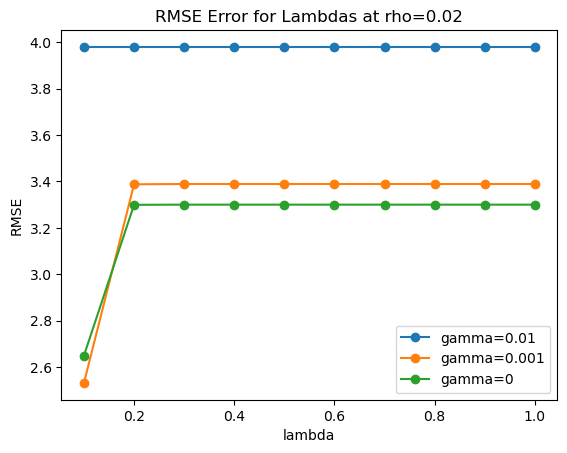

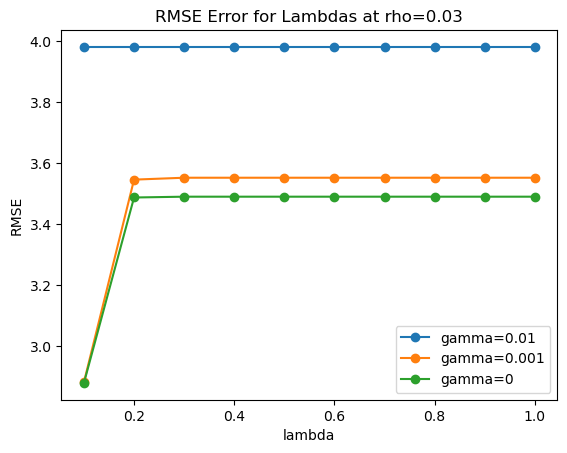

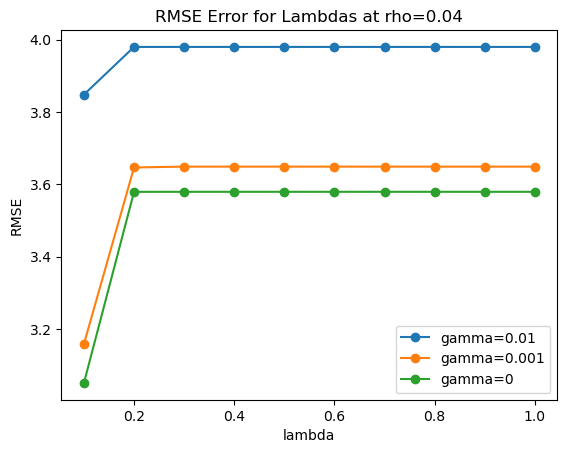

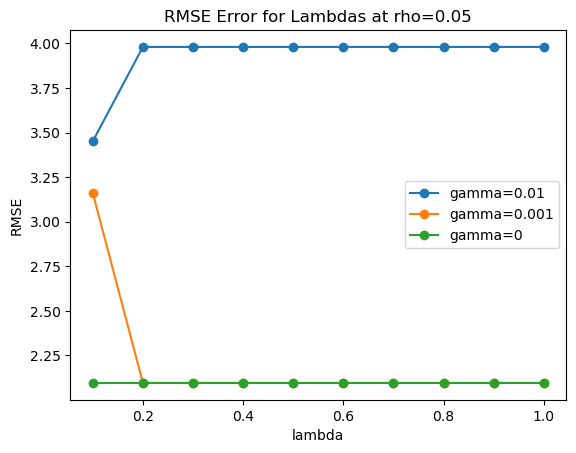

IndexError: list index out of range

In [34]:
for r in rhos:
    rhoCheckPlots(r)

In [35]:
results_df['errors'] = results_df['errors'].apply(ast.literal_eval)

for i in range(len(results_df['errors'])):
    results_df['errors'][i]=results_df['errors'][i][-1][1]

C:\Users\kesol\AppData\Local\Temp\ipykernel_25568\1626792509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['errors'][i]=results_df['errors'][i][-1][1]


IndexError: list index out of range

In [36]:
# Removing a single column
df = results_df.drop('relative_errors', axis=1)


In [37]:

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df.head())


df.shape


Updated DataFrame:
   lambda   rho  gamma    errors  rank
0     0.1  0.01  0.000  2.139267    20
1     0.1  0.01  0.001  2.185498    20
2     0.1  0.01  0.010  3.979986     0
3     0.2  0.01  0.000   2.84277    21
4     0.2  0.01  0.001  2.998311    20


(300, 5)

In [38]:
def checkPlots(gamma, r=False):
    # Assuming your DataFrame is named df_results
    err_arr = np.array(df['errors'])
    r_arr = np.array(df['rank'])

    if r == True:
        err_arr=r_arr


    # Prepare data for three different gamma values
    gamma_0_data = err_arr[::3]       # Rows for gamma = 0
    gamma_001_data = err_arr[1::3]     # Rows for gamma = 0.001
    gamma_01_data = err_arr[2::3]      # Rows for gamma = 0.01
    
    if gamma == 0:
        err_li = gamma_0_data
    elif gamma == 0.001:
        err_li = gamma_001_data
    elif gamma == .01:
        err_li = gamma_01_data
    
    
    for i in range(10):
        
        plt.plot(rhos,err_li[i::10], 'o-' ,label=f'lamda = {round(.1*(i+1),1)}')
    # # x = lambdas
    
    # plt.plot(lambdas,RMSE_2,'o-' ,label='gamma=0.001')
    # plt.plot(lambdas,RMSE_1, 'o-' ,label='gamma=0')
    plt.xlabel('rhos')
    plt.ylabel('RMSE')
    plt.title(f"RMSE Error for Lambdas at gamma={gamma}")
    
    if r == True:
        plt.ylabel('Rank')
        plt.title(f"Rank for Lambdas at gamma={gamma}")
    plt.legend()
    plt.show()

In [51]:
def checkPlots(gamma, r=False):
    # Assuming your DataFrame is named df
    err_arr = np.array(df['errors'])
    r_arr = np.array(df['rank'])

    # If `r` is True, use `r_arr` instead of `err_arr`
    if r:
        err_arr = r_arr

    # Prepare data for three different gamma values
    gamma_0_data = err_arr[::3]       # Rows for gamma = 0
    gamma_001_data = err_arr[1::3]    # Rows for gamma = 0.001
    gamma_01_data = err_arr[2::3]     # Rows for gamma = 0.01

    # Select the appropriate data based on the gamma value
    if gamma == 0:
        err_li = gamma_0_data
    elif gamma == 0.001:
        err_li = gamma_001_data
    elif gamma == 0.01:
        err_li = gamma_01_data
    else:
        print("Invalid gamma value. Please use 0, 0.001, or 0.01.")
        return

    # Ensure `rhos` is defined and is a NumPy array
    if 'rhos' not in globals():
        print("Error: 'rhos' is not defined.")
        return
    
    rhos_array = np.array(rhos)

    # Check the dimensions of `rhos` and `err_li`
    if len(rhos_array.shape) != 1:
        print("Error: 'rhos' should be a 1D array.")
        return

    # Check if `err_li` has the expected length
    if len(err_li) < 10:
        print(f"Error: The length of `err_li` is {len(err_li)}, expected at least 10.")
        return

    # Plot the data
    for i in range(10):
        try:
            plt.plot(rhos_array, err_li[i::10], 'o-', label=f'lambda = {round(.1*(i+1), 1)}')
        except Exception as e:
            print(f"Error plotting lambda = {round(.1*(i+1), 1)}: {e}")
            continue

    plt.xlabel('rhos')
    plt.ylabel('RMSE' if not r else 'Rank')
    plt.title(f"{'RMSE Error' if not r else 'Rank'} for Lambdas at gamma={gamma}")
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Error plotting lambda = 0.1: setting an array element with a sequence.
Error plotting lambda = 0.2: setting an array element with a sequence.
Error plotting lambda = 0.3: setting an array element with a sequence.
Error plotting lambda = 0.4: setting an array element with a sequence.
Error plotting lambda = 0.5: setting an array element with a sequence.
Error plotting lambda = 0.6: setting an array element with a sequence.
Error plotting lambda = 0.7: setting an array element with a sequence.
Error plotting lambda = 0.8: setting an array element with a sequence.
Error plotting lambda = 0.9: setting an array element with a sequence.
Error plotting lambda = 1.0: setting an array element with a sequence.


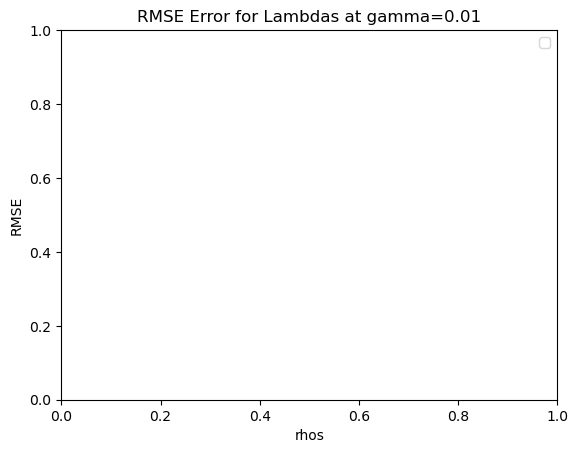

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Error plotting lambda = 0.1: setting an array element with a sequence.
Error plotting lambda = 0.2: setting an array element with a sequence.
Error plotting lambda = 0.3: setting an array element with a sequence.
Error plotting lambda = 0.4: setting an array element with a sequence.
Error plotting lambda = 0.5: setting an array element with a sequence.
Error plotting lambda = 0.6: setting an array element with a sequence.
Error plotting lambda = 0.7: setting an array element with a sequence.
Error plotting lambda = 0.8: setting an array element with a sequence.
Error plotting lambda = 0.9: setting an array element with a sequence.
Error plotting lambda = 1.0: setting an array element with a sequence.


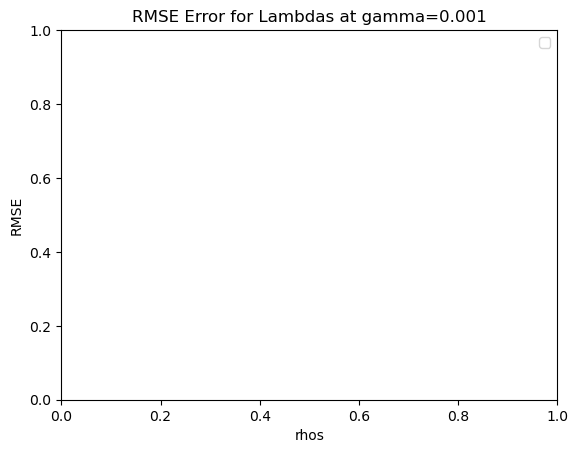

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Error plotting lambda = 0.1: setting an array element with a sequence.
Error plotting lambda = 0.2: setting an array element with a sequence.
Error plotting lambda = 0.3: setting an array element with a sequence.
Error plotting lambda = 0.4: setting an array element with a sequence.
Error plotting lambda = 0.5: setting an array element with a sequence.
Error plotting lambda = 0.6: setting an array element with a sequence.
Error plotting lambda = 0.7: setting an array element with a sequence.
Error plotting lambda = 0.8: setting an array element with a sequence.
Error plotting lambda = 0.9: setting an array element with a sequence.
Error plotting lambda = 1.0: setting an array element with a sequence.


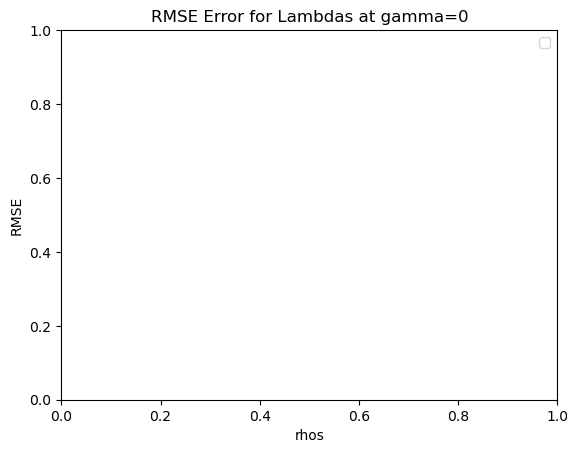

In [52]:
checkPlots(0.01)
checkPlots(0.001)
checkPlots(0)

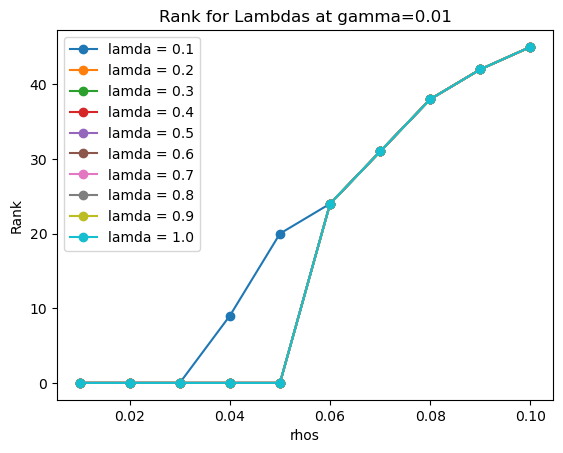

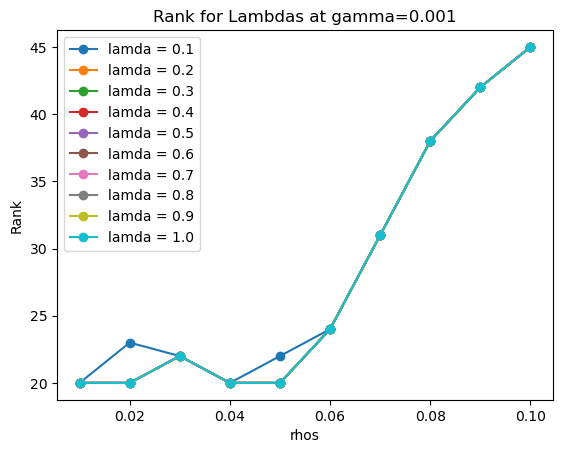

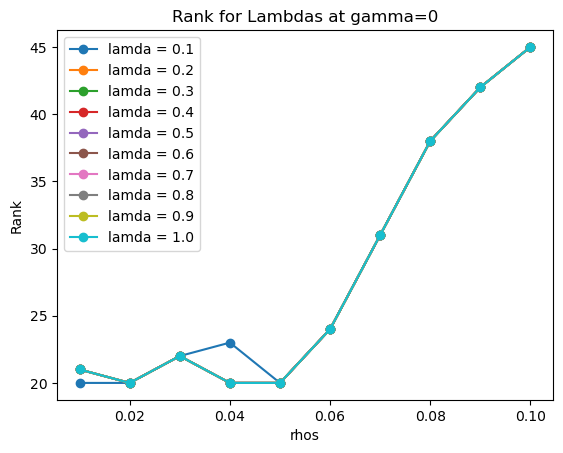

In [40]:
checkPlots(0.01, True)
checkPlots(0.001,True)
checkPlots(0,True)

In [44]:

def SVD_truncated(A, k):
    """
    Apply the thresholding operator to the singular values of X
    """
    U, S, V = np.linalg.svd(A, full_matrices=False)
    n= len(S)
    
    if k > n:
        k = n
    
    S= S[:k]
    U = U[:, :k]
    V = V[:k, :]
    return (U* S) @ V

In [45]:
100* np.linalg.norm(SVD_truncated(dense_matrix,45)-dense_matrix, 'fro')/np.linalg.norm(dense_matrix, 'fro')


17.186709821975054

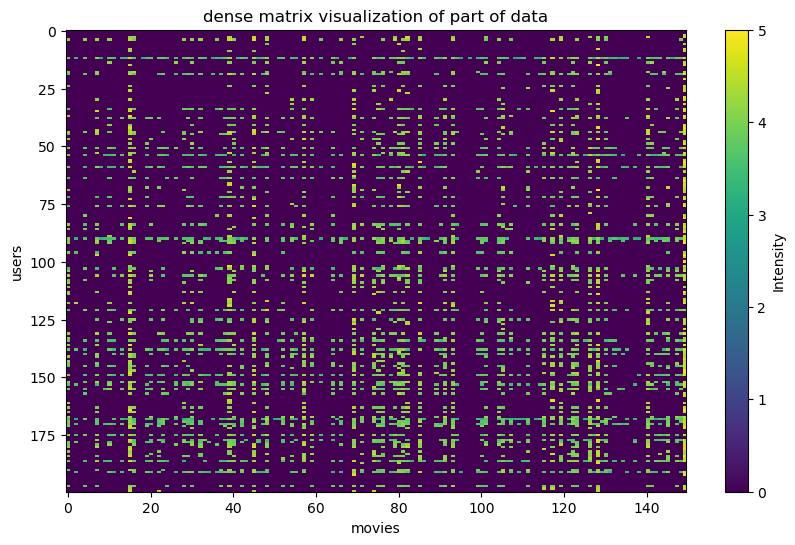

In [20]:
visualizeData(dense_matrix)

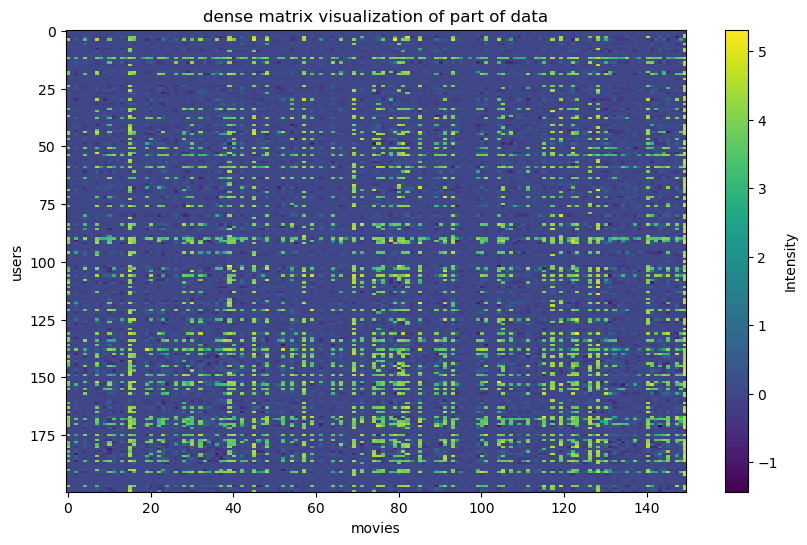

In [47]:
visualizeData(SVD_truncated(dense_matrix, 45))

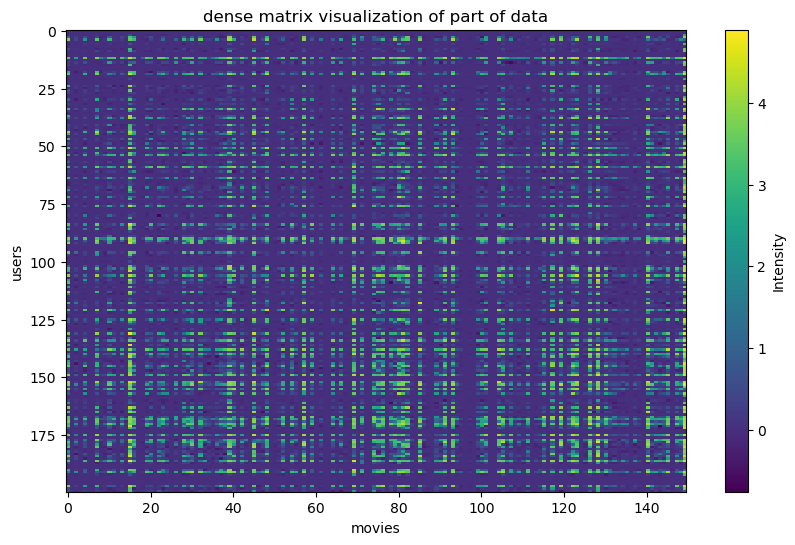

In [46]:
visualizeData(P_final)

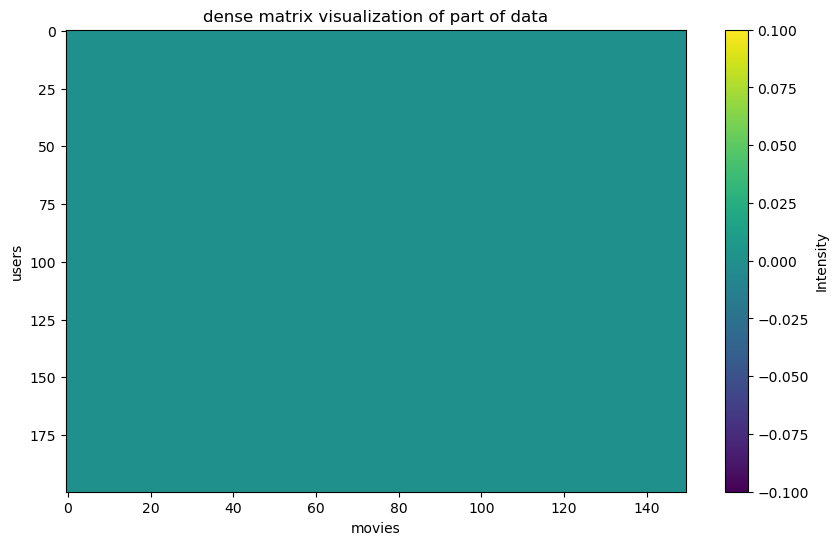

In [48]:
visualizeData(Z_final)

In [49]:
Z_final

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
1/.1

10.0